In [1]:
# from model_definitions import wrapped_linear
from SALib import ProblemSpec
import time
import ra_func_gsa as ra
import numpy as np


if __name__ == "__main__":
    start_time = time.time()  # 记录开始时间
    sp = ProblemSpec({
        'names': ['M', 'R', 'V_s30', 'F', 'm_b',
                  'kesi', 'P_nsq', 'M_bcj',
                  'M_gcw', 'M_wp', 'M_sc', 'M_ele',
                  'M_hvac', 'M_rf', 'S_rf', 'C_rep'],
        'bounds': [
            [6.0, 8.0], [10, 100], [600, 1500], [0, 1], [0.872, 1.128, 1, 0.1],
            [0.02, 0.05], [0, 1], [0.616, 1.384, 1, 0.3],
            [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3],
            [0.616, 1.384, 1, 0.3], [0.005, 0.015], [0.1, 0.8], [1, 1.0/0.3]
        ],
        'dists': ['unif', 'unif', 'unif', 'unif', 'truncnorm',
                  'unif', 'unif', 'truncnorm',
                  'truncnorm', 'truncnorm', 'truncnorm', 'truncnorm',
                  'truncnorm', 'unif', 'unif', 'unif']
    })

    (
        sp.sample_sobol(2**9, calc_second_order=False)
        .evaluate(ra.ResilienceAssessment, nprocs=16)
        .analyze_sobol(calc_second_order=False)
    )
    # 采样和运行结果存储
    np.savetxt("samples0820.txt", sp.samples)
    np.savetxt("results0820.txt", sp.results)
    # 存储计算结果
    sp_data = sp.to_df()
    # 打开文件
    with open('sp_output0820.txt', 'w') as file:
        # 将列表中的元素逐行写入文件
        for item in sp_data:
            file.write(str(item) + '\n')
    # 关闭文件
    file.close()
    end_time = time.time()  # 记录结束时间
    elapsed_time = end_time - start_time  # 计算时间差
    print('计算时间为', elapsed_time, 's')
    print(sp)

C:\Users\12734\AppData\Roaming\Python\Python310\site-packages\SALib\util\problem.py:210: UserWarning: Parallel evaluation is an experimental feature and may not work.
  warnings.warn(


计算时间为 95993.85832118988 s
Samples:
	16 parameters: ['M', 'R', 'V_s30', 'F', 'm_b', 'kesi', 'P_nsq', 'M_bcj', 'M_gcw', 'M_wp', 'M_sc', 'M_ele', 'M_hvac', 'M_rf', 'S_rf', 'C_rep']
	9216 evaluations 

Outputs:
	1 outputs: ['Y']
	9216 evaluations 

Analysis:
              ST   ST_conf
M       0.486315  0.143098
R       0.879783  0.145091
V_s30   0.570534  0.167141
F       0.491528  0.124767
m_b     0.547727  0.173759
kesi    0.505379  0.122577
P_nsq   0.677803  0.199612
M_bcj   0.519717  0.150023
M_gcw   0.623631  0.202756
M_wp    0.569552  0.137913
M_sc    0.675908  0.193172
M_ele   0.540863  0.144915
M_hvac  0.527131  0.151895
M_rf    0.519806  0.188903
S_rf    0.477406  0.149835
C_rep   0.394569  0.115229 

              S1   S1_conf
M      -0.025369  0.087836
R       0.448326  0.169896
V_s30  -0.026110  0.061355
F      -0.034459  0.059742
m_b    -0.054147  0.066238
kesi   -0.027965  0.060067
P_nsq  -0.053778  0.065717
M_bcj  -0.038578  0.071078
M_gcw  -0.048830  0.069262
M_wp   -0.0133

array([<Axes: >, <Axes: >], dtype=object)

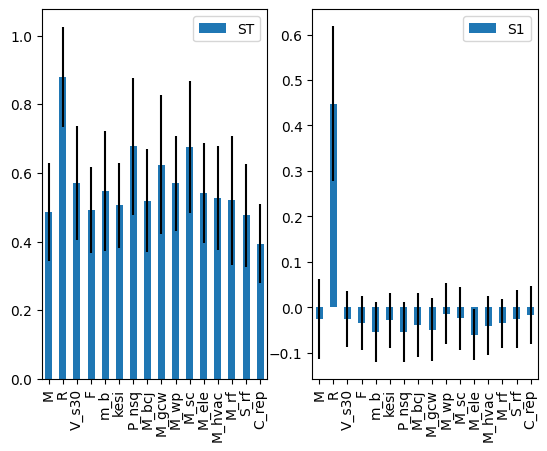

In [4]:
sp.plot()

In [8]:
sp.samples

array([[7.95569927e+00, 7.99846675e+01, 1.44345425e+03, ...,
        6.46486880e-03, 6.22094405e-01, 1.93015453e+00],
       [7.58257743e+00, 7.99846675e+01, 1.44345425e+03, ...,
        6.46486880e-03, 6.22094405e-01, 1.93015453e+00],
       [7.95569927e+00, 7.83620761e+01, 1.44345425e+03, ...,
        6.46486880e-03, 6.22094405e-01, 1.93015453e+00],
       ...,
       [7.95791486e+00, 2.34434115e+01, 1.20576985e+03, ...,
        1.48579318e-02, 2.85920592e-01, 2.86329011e+00],
       [7.95791486e+00, 2.34434115e+01, 1.20576985e+03, ...,
        1.48579318e-02, 5.45503251e-01, 2.48485732e+00],
       [6.62170055e+00, 7.58614058e+01, 7.15872714e+02, ...,
        1.04442536e-02, 2.85920592e-01, 2.48485732e+00]])

In [11]:
import SALib.analyze.pawn as pawn
problem = ({
    'num_vars': 16,
    'names': ['M', 'R', 'V_s30', 'F', 'm_b',
                'kesi', 'P_nsq', 'M_bcj',
                'M_gcw', 'M_wp', 'M_sc', 'M_ele',
                'M_hvac', 'M_rf', 'S_rf', 'C_rep'],
    'bounds': [
        [6.0, 8.0], [10, 100], [600, 1500], [0, 1], [0.872, 1.128, 1, 0.1],
        [0.02, 0.05], [0, 1], [0.616, 1.384, 1, 0.3],
        [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3],
        [0.616, 1.384, 1, 0.3], [0.005, 0.015], [0.1, 0.8], [1, 1.0/0.3]
    ],
    'dists': ['unif', 'unif', 'unif', 'unif', 'truncnorm',
                'unif', 'unif', 'truncnorm',
                'truncnorm', 'truncnorm', 'truncnorm', 'truncnorm',
                'truncnorm', 'unif', 'unif', 'unif']
})
X = sp.samples
Y = sp.results
Si = pawn.analyze(problem, X, Y)
Si

{'minimum': array([0.01561647, 0.12295506, 0.01396974, 0.02050143, 0.0125099 ,
        0.0152548 , 0.02023123, 0.02295454, 0.01263681, 0.01631778,
        0.01711857, 0.01529099, 0.03524361, 0.0158335 , 0.01569177,
        0.01712617]),
 'mean': array([0.04489235, 0.30926558, 0.0255261 , 0.02967017, 0.02875293,
        0.04904823, 0.03297111, 0.02834691, 0.03517981, 0.03358513,
        0.02978784, 0.02400012, 0.07356404, 0.02206615, 0.02445587,
        0.02662206]),
 'median': array([0.04048525, 0.30038233, 0.0248768 , 0.02786075, 0.02909354,
        0.04330172, 0.03259038, 0.02750545, 0.03718703, 0.03019621,
        0.02443784, 0.02332966, 0.06808385, 0.01937097, 0.02370446,
        0.02515301]),
 'maximum': array([0.08382754, 0.61045156, 0.03725674, 0.04116243, 0.04144491,
        0.10347914, 0.05018644, 0.04311185, 0.05454346, 0.06013412,
        0.05231827, 0.03351261, 0.16677305, 0.0387095 , 0.03369673,
        0.04467982]),
 'CV': array([0.53799648, 0.46964854, 0.28035626, 0.2332

<Axes: >

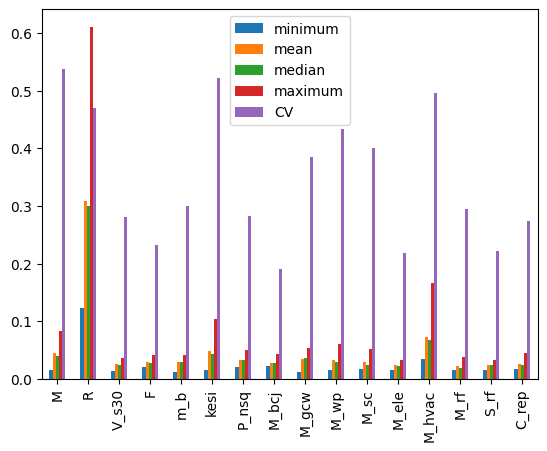

In [13]:
Si.plot()

(array([6.257e+03, 4.800e+02, 2.920e+02, 2.120e+02, 1.770e+02, 1.310e+02,
        1.090e+02, 8.700e+01, 8.000e+01, 7.300e+01, 6.300e+01, 6.800e+01,
        6.300e+01, 7.400e+01, 5.400e+01, 5.500e+01, 3.300e+01, 5.300e+01,
        6.100e+01, 4.400e+01, 4.800e+01, 5.800e+01, 4.800e+01, 3.400e+01,
        4.400e+01, 4.300e+01, 2.900e+01, 3.900e+01, 2.100e+01, 2.800e+01,
        2.700e+01, 3.100e+01, 2.100e+01, 2.100e+01, 3.400e+01, 1.800e+01,
        2.200e+01, 1.400e+01, 1.700e+01, 8.000e+00, 1.400e+01, 1.600e+01,
        9.000e+00, 7.000e+00, 7.000e+00, 1.400e+01, 9.000e+00, 1.300e+01,
        3.000e+00, 5.000e+00, 3.000e+00, 7.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

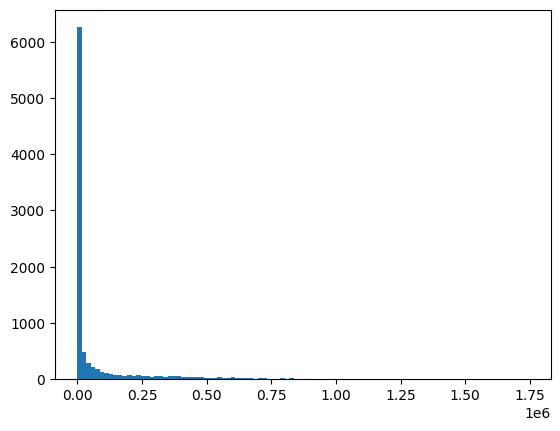

In [16]:
import matplotlib.pyplot as plt
plt.hist(sp.results,bins=100)

In [1]:
from SALib.sample import sobol

problem = {
    'num_vars': 17,
    'names': ['M', 'R', 'V_s30', 'F', 'm_b',
              'kesi', 'P_nsq', 'Q_con', 'M_bcj',
              'M_gcw', 'M_wp', 'M_sc', 'M_ele',
              'M_hvac', 'M_rf', 'S_rf', 'C_rep'],
    'bounds': [
            [6.0, 8.0], [10, 100], [600, 1500], [0, 1], [0.872, 1.128, 1, 0.1],
            [0.02, 0.05], [0, 1], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3],
            [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3], [0.616, 1.384, 1, 0.3],
            [0.616, 1.384, 1, 0.3], [0.005, 0.015], [0.1, 0.8], [1, 1.0/0.3]
    ],
    'dists': ['unif', 'unif', 'unif', 'unif', 'truncnorm',
              'unif', 'unif', 'truncnorm','truncnorm',
              'truncnorm', 'truncnorm', 'truncnorm', 'truncnorm',
              'truncnorm', 'unif', 'unif', 'unif']
}
param_values = sobol.sample(problem, 2**6)

In [2]:
import os
print(os.getcwd())

c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess


In [9]:
import numpy as np
a1 = 10
a2 = 40
a3 = 60
b = np.zeros(100)
b[a1+a2:100] = np.zeros(100-a1-a2)

In [1]:
import ra_func_gsa as ra
import numpy as np
import os
from StochasticGroundMotionModeling import StochasticGroundMotionModeling
import matplotlib.pyplot as plt
os.chdir(r"c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code")
input = np.array([[7.965637523680925369e+00, 7.807295236736536026e+01, 1.329014329332858324e+03, 2.762317843735218048e-01,
                  9.220246216817944429e-01, 4.623287566006183819e-02, 4.675927665084600449e-02, 1.003561423259697438e+00,
                  1.024348543391025101e+00, 6.409580939327335081e-01, 8.932387341653413859e-01, 8.091168696387407433e-01,
                  1.011655647660180790e+00, 1.058744054287671932e-02, 3.267620566301048246e-01, 1.024904189320902104e+00]])
Output = ra.ResilienceAssessment(input)


c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess
0


Modified Ibarra-Medina-Krawinkler Model with Bilinear Hysteretic Response


Analysis Completed!
[9.87566784e-04 1.02621841e-03 6.47299144e-04 7.23327684e-02
 4.91731789e-02 5.35190084e-02 5.82767915e-02 6.62515780e-05]


array([0.])

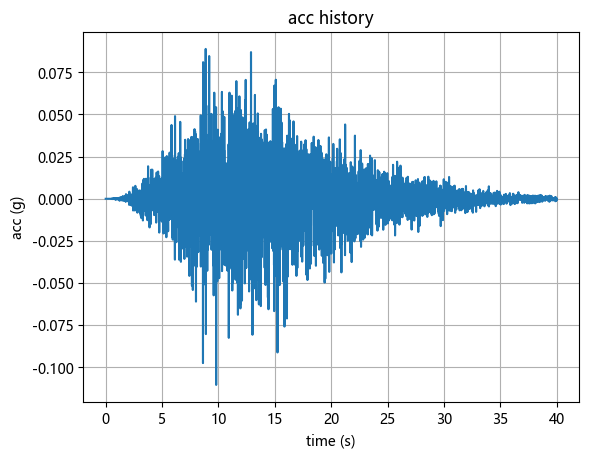

In [3]:
import ra_func_gsa as ra
import numpy as np
import os
from StochasticGroundMotionModeling import StochasticGroundMotionModeling
import matplotlib.pyplot as plt
os.chdir(r"c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code")
input = np.array([[7.965637523680925369e+00, 7.807295236736536026e+01, 1.329014329332858324e+03, 2.762317843735218048e-01,
                  9.220246216817944429e-01, 4.623287566006183819e-02, 4.675927665084600449e-02, 1.003561423259697438e+00,
                  1.024348543391025101e+00, 6.409580939327335081e-01, 8.932387341653413859e-01, 8.091168696387407433e-01,
                  1.011655647660180790e+00, 1.058744054287671932e-02, 3.267620566301048246e-01, 1.024904189320902104e+00]])
M, R, V_s30, F, m_b, kesi, P_nsq, M_bcj, M_gcw, M_wp, M_sc, M_ele, M_hvac, M_rf, S_rf, C_rep = input[0, :]
ACC, tn = StochasticGroundMotionModeling(M, R, V_s30, F)
t = np.arange(0, tn + 0.01, 0.01)
plt.plot(t, ACC)
plt.xlabel('time (s)')
plt.ylabel('acc (g)')
plt.title('acc history')
plt.grid(True)
plt.show()
# Output = ra.ResilienceAssessment(input)

(0.001, 10)

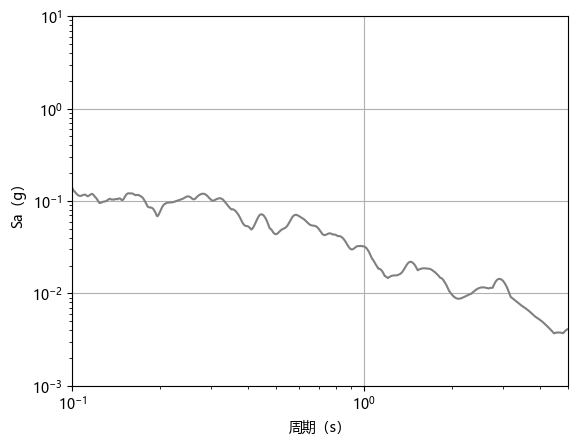

In [4]:
# 精确积分法求解
# 引入所需要的库
# 作者：Jiajun Du
import math
import numpy as np
import matplotlib.pyplot as plt
# import time
# from tqdm import tqdm,trange
#plt.style.use("ggplot")
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False
# title：绘图标题；ta：地震动时序，a：地震动加速度幅值，t:周期时序，u:位移最大值序列，v，amax分别为速度和加速度最大值序列
from numba import jit

# 用Newmark方法求解地震动下结构的反应，omg：结构自振圆频率，zeta：结构阻尼比
# ag：地震加速度值，dt：地震步长
@jit(nopython=True)
def solve_sdof_eqwave_nmk(omg,zeta,ag,dt):
    omg2 = omg * omg
    #Newmark方法参数，gama和beta，本取值代表了采用的是线加速度法,如果把beta换成0.25就是平均加速度法
    gama = 0.5
    beta = 1 / 6
    
    c = 2*zeta*omg # 阻尼，除以质量m
    keq = omg2 + gama/(beta*dt)*c + 1/(beta*dt*dt)  #等效刚度
    
    n = len(ag)
    u = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)
    u[0] = 0.0 #初始位移设为0
    v[0] = 0.0 #初始速度设为0
    a[0] = -ag[0]-c*v[0]-omg2*u[0] # 利用运动方程给出时间间隔下的初始加速度
    
    for i in range(n-1):
        peq = (-ag[i+1] + (1/beta/dt/dt+gama/beta/dt*c)*u[i] + (1/beta/dt+(gama/beta-1)*c)*v[i]
               +((1/2/beta-1)+dt*(gama/2/beta-1)*c)*a[i])
        u[i+1] = peq/keq
        v[i+1] = gama/beta/dt*(u[i+1]-u[i])+(1-gama/beta)*v[i]+dt*(1-gama/2/beta)*a[i]
        a[i+1] = -ag[i+1]-c*v[i+1]-omg2*u[i+1]
        
    umax = max(np.abs(u))
    vmax = max(np.abs(v))
    amax = omg2*umax
    return umax,vmax,amax


@jit(nopython=True)
def solve_nigam_jennings(omg, zeta, ag, dnt):
    w = omg
    h = zeta
    dt = dnt
    c = 2*h*w # 阻尼，除以质量m
    wd = math.sqrt(1-h*h) * w
    w2 = w*w
    w3 = w*w*w
    wddt = wd*dt
    swddt = math.sin(wddt)
    cwddt = math.cos(wddt)
    ehwt = math.exp(-h*w*dt)
    hc = h/(math.sqrt(1-h*h))
    a11 = ehwt*(hc*swddt+cwddt)
    a12 = ehwt/wd*swddt
    a21 = -w/(math.sqrt(1-h*h))*ehwt*swddt
    a22 = ehwt*(cwddt-hc*swddt)
    
    hc2 = (2*h*h-1)/(w*w*dt)
    hw3dt = 2*h/w/w/w/dt
    b11 = ehwt*((hc2+h/w)*swddt/wd+(hw3dt+1/w/w)*cwddt)-hw3dt
    b12 = -ehwt*(hc2*swddt/wd+hw3dt*cwddt)-1/w/w+hw3dt
    b21 = ehwt*((hc2+h/w)*(cwddt-hc*swddt)-(hw3dt+1/w/w)*(wd*swddt+h*w*cwddt))+1/w/w/dt
    b22 = -ehwt*(hc2*(cwddt-hc*swddt)-hw3dt*(wd*swddt+h*w*cwddt))-1/w/w/dt
    n = len(ag)
    u = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)
    u[0] = 0.0 #初始位移设为0
    v[0] = 0.0 #初始速度设为0
    a[0] = -ag[0]-c*v[0]-w2*u[0] # 利用运动方程给出时间间隔下的初始加速度
    for i in range(n-1):
        u[i+1] = a11*u[i] + a12*v[i] + b11*ag[i] + b12*ag[i+1]
        v[i+1] = a21*u[i] + a22*v[i] + b21*ag[i] + b22*ag[i+1]
        
    umax = max(np.abs(u))
    vmax = max(np.abs(v))
    amax = w2*umax
    return umax,vmax,amax

# Sa 伪加速度
# import pandas as pd
# from StochasticGroundMotionModeling import StochasticGroundMotionModeling
# if __name__ == '__main__':
    
# Stochastic Model
plt.figure()

# acc0, dt = StochasticGroundMotionModeling(6.69, 20.3, 1223, i)
acc0 = ACC
dt = 0.01
# acc0 = np.array(acc_0)
# acc0 = acc0/100
acc0 = acc0
# dt = 0.02
# dt = 0.01
n = len(acc0)
t0 = np.linspace(0.0,dt*(n-1),n)
ag = acc0
dnt=0.01
# zetas = [0.01,0.02,0.03,0.04,0.05,0.1]
zetas = [0.05]

num = 5000
row = len(zetas)
umax = np.zeros((row,num))
vmax = np.zeros((row,num))
amax = np.zeros((row,num))
T = np.linspace(0.01,6.00,num)  #支持更高精度
j=0
for zeta in zetas: 
    i = 0
    for T1 in T:
        omg = 2.0*np.pi/T1
        umax[j][i], vmax[j][i], amax[j][i] = solve_nigam_jennings(omg, zeta, ag, dnt) #此处的dnt应该是迭代步长
        i = i+1
    j += 1 
for js in range(j):
    plt.loglog(T,amax[js,:],label = r"damp=%s" % zetas[js], color = 'gray')
    
plt.xlabel(r"周期（s）",fontsize=10)
plt.ylabel(r"Sa（g）",fontsize=10)
plt.grid(True)
plt.xlim(0.1,5)
plt.ylim(1e-3, 10)

In [2]:
# import modules
import numpy as np
import pandas as pd
import pathlib
import pickle
# module for SGMM
from StochasticGroundMotionModeling import StochasticGroundMotionModeling
# module for NTHA
from BuildingObject import Building_object
from beam_component import Beam
from column_component import Column
from steel_material import SteelMaterial
from nonlinear_analysis import NonlinearAnalysis
# module for seismic consequence evaluation
from loss_calculation import Data

# BASE INFORMATION
os.chdir(r"c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code")
cwdFile = pathlib.Path.cwd()
cwdFile = cwdFile / 'ResilienceAssessment' / 'MainProcess'
print(cwdFile)
buildingDataFile = cwdFile / 'BuildingData'
# geometryFile = buildingDataFile / 'Geometry.csv'
memberSizeFile = buildingDataFile / 'MemberSize.csv'
loadsFile = buildingDataFile / 'Loads.csv'

member_size = pd.read_csv(memberSizeFile)
gravity_loads = pd.read_csv(loadsFile)
directory = {}
directory = {'building data': buildingDataFile}
building = Building_object(directory, member_size, gravity_loads)

# beams
beamSizeFile = buildingDataFile / 'beamsectionsize.csv'
SectionDatabaseFile = cwdFile / 'AllSectionDatabase.csv'
SectionDatabase = pd.read_csv(SectionDatabaseFile)

steel = SteelMaterial(yield_stress=50, ultimate_stress=65, elastic_modulus=29000,
                        Ry_value=1.1)  # Unit: ksi
# 创建包含梁信息的嵌套字典
beam_section_size = pd.read_csv(beamSizeFile)
beams = {}
length = int(building.geometry['X bay width'])
for _, row in beam_section_size.iterrows():
    level, bay = map(int, row[:2])
    bsection_size = {'size': row[2]}
    beams.setdefault(level, {})
    beams[level].setdefault(bay, {})
    beams[level][bay] = Beam(bsection_size['size'], length, steel, SectionDatabase)

# elastic demand
elasticDemandFile = cwdFile / 'elastic_demand.pkl'
with open(elasticDemandFile, 'rb') as f:
    elastic_demand = pickle.load(f)

# column
columnSizeFile = buildingDataFile / 'columnsectionsize.csv'
SectionDatabaseFile = cwdFile / 'AllSectionDatabase.csv'
SectionDatabase = pd.read_csv(SectionDatabaseFile)

steel = SteelMaterial(yield_stress=50, ultimate_stress=65, elastic_modulus=29000,
                        Ry_value=1.1)  # Unit: ksi

# 构建包含柱信息的嵌套字典
column_section_size = pd.read_csv(columnSizeFile)
columns = {}
for _, row in column_section_size.iterrows():
    story, pier = map(int, row[:2])
    csection_size = {'size': row[2]}
    columns.setdefault(story, {})
    columns[story].setdefault(bay, {})
    axial_demand = abs(elastic_demand.dominate_load['column axial'][story, 2 * pier])
    Lx = (building.geometry['floor height'][story+1] - building.geometry['floor height'][story]).item()
    Ly = Lx
    columns[story][pier] = Column(csection_size['size'], axial_demand, Lx, Ly, steel, SectionDatabase)
baseFile = cwdFile
nSample = 1
edpOutput = np.empty((nSample, 8))
costOutput = np.empty(nSample)  # results
dt = 0.01
ACC = ACC.tolist()
edpResult = NonlinearAnalysis(building, columns, beams, baseFile, ACC, dt, m_b, kesi)
edpResult

c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess


Modified Ibarra-Medina-Krawinkler Model with Bilinear Hysteretic Response


Analysis Completed!


array([0.00109884, 0.00115541, 0.0006338 , 0.07528581, 0.04749543,
       0.04166373, 0.05573309, 0.00055466])

# 实验loss calculation multioutput代码的有效性

In [1]:
import numpy as np
from loss_calculation_multioutput import Data
import os


os.chdir(r"c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code")
input = np.array([[7.965637523680925369e+00, 7.807295236736536026e+01, 1.329014329332858324e+03, 2.762317843735218048e-01,
                  9.220246216817944429e-01, 4.623287566006183819e-02, 4.675927665084600449e-02, 1.003561423259697438e+00,
                  1.024348543391025101e+00, 6.409580939327335081e-01, 8.932387341653413859e-01, 8.091168696387407433e-01,
                  1.011655647660180790e+00, 1.058744054287671932e-02, 3.267620566301048246e-01, 1.024904189320902104e+00]])
M, R, V_s30, F, m_b, kesi, P_nsq, M_bcj, M_gcw, M_wp, M_sc, M_ele, M_hvac, M_rf, S_rf, C_rep = input[0, :]
data = Data(P_nsq, M_bcj, M_gcw, M_wp, M_sc, M_ele, M_hvac)
# edpResult = np.array([4.95981904e-04, 5.27656221e-04, 3.07870110e-04, 4.59117351e-02,
#                       1.89238564e-02, 2.25001922e-02, 2.78918384e-02, 4.02149940e-05])
# edpResult = np.array([0.05, 0.05, 0.05, 1, 1, 1, 1, 0.0001])
edpResult = np.array([9.87566784e-04, 1.02621841e-03, 6.47299144e-04, 7.23327684e-02,
                      4.91731789e-02, 5.35190084e-02, 5.82767915e-02, 6.62515780e-05])
IDR = edpResult[:3]
PFA = edpResult[3:7]
RIDR = edpResult[7]
IDR = np.tile(IDR, (1000, 1))
PFA = np.tile(PFA, (1000, 1))
RIDR = np.tile(RIDR, (1000, 1))
costOut_mean = data.costOut(IDR, PFA, RIDR, M_rf, S_rf, C_rep)

In [2]:
np.mean(costOut_mean)

0.0

In [9]:
maxRepairCost, _, _, _ = data.cal_repair(IDR, PFA, 1000, worstCase=1)
print(np.mean(maxRepairCost))
print(np.max(maxRepairCost))

8303241.6214715475
9752349.928829642


In [6]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import lognorm


def pro(p, s, loc):
    x = lognorm.ppf(p, s=s, loc=loc)
    return x
# 定义最小二乘法拟合函数
def fit_lognormal(x, y):
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)
    # p0 = [np.mean(x_sorted), np.std(x_sorted)]  # 初始猜测的参数值使用均值和标准差
    # p0 = [np.std(x_sorted), np.mean(x_sorted)]  # 初始猜测的参数值使用均值和标准差
    p0 = [1, 0.7]  # 初始猜测的参数值使用均值和标准差
    
    
    params, pcov = curve_fit(lognorm.ppf, y_sorted, x_sorted, p0)
    sigma, mu = params
    return mu, sigma

# 输入分位值和对应的数据
x = np.array([0.0005, 0.00105, 0.0026])
# x = np.array([0.02, 0.042, 0.104])
x = np.log(x)
y = np.array([0.1, 0.5, 0.9])  # 分位值对应的百分比为0.1, 0.5, 0.9

# 最小二乘法拟合
mu, sigma = fit_lognormal(x, y)

# 输出拟合结果
print("拟合得到的参数：")
print("mu =", mu)
print("sigma =", sigma)


拟合得到的参数：
mu = -7.985067842871238
sigma = 0.5627670771602907


32829.47967726992
12330.796951109389
4924.421951590488
10481.177408442982
15405.599360033468
15325.21739792794
